# First look at using database to quickly graph potential metrics

# list of possible metrics

https://pmc.ncbi.nlm.nih.gov/articles/PMC5624990/
- to maybe add to analysis:
    - distribution of RR intervals
    - RR poincaré plot


- Average HR over whole time
- Average HR by week
- Average HR by month
- HR range per day
- HR max per day
- HRV standard dev. per day
- mean of the standard devs.
- HRV average per day
- average HR during activity
    - HRV standard dev. during days with activity
    - max and min HR on days with activity
    - HRV standard dev. during nights after activity
    - max and min HR during nights after activity
    - resting HR on days with activity
- resting HR per week
- resting HR per month
- resting HR per day
- scaling exponent difference after crossover
- crossover point against length of time measured
- crossover point average and standard dev. for healthy and unhealthy
- difference in resting and average hr per day


# Average standard deviation in PPG HRV per day

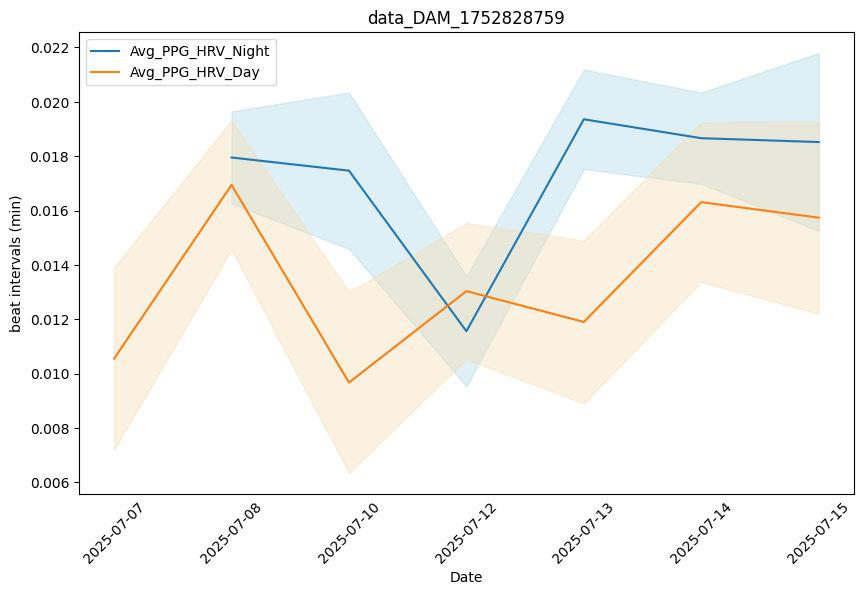

In [63]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
db_name='volunteer_metrics.db'
patient_ID='data_DAM_1752828759'
con=sqlite3.connect(db_name)
cur=con.cursor()
test_data=cur.execute("SELECT Night_Vitals.Std_PPG_HRV_Night,Daily_Vitals.Std_PPG_HRV_Day,Night_Vitals.Avg_PPG_HRV_Night,Daily_Vitals.Avg_PPG_HRV_Day,\
    Daily_Vitals.Date FROM Daily_Vitals INNER JOIN Night_Vitals on Daily_Vitals.Date_Vitals=Night_Vitals.Date_Vitals WHERE Daily_Vitals.Patient_ID=?", (patient_ID,)).fetchall()
c=[description[0] for description in cur.description]
df=pd.DataFrame(test_data,columns=c)

fig,ax=plt.subplots(figsize=(10,6))
df.plot(x=c[-1],y=c[2:-1],ax=ax,ylabel='beat intervals (min)',title=patient_ID)
ax.fill_between(x=df['Date'],y1=df['Avg_PPG_HRV_Night']-df['Std_PPG_HRV_Night'],y2=df['Avg_PPG_HRV_Night']+df['Std_PPG_HRV_Night'],alpha=0.4,color='lightblue')
ax.fill_between(x=df['Date'],y1=df['Avg_PPG_HRV_Day']-df['Std_PPG_HRV_Day'],y2=df['Avg_PPG_HRV_Day']+df['Std_PPG_HRV_Day'],alpha=0.4,color='wheat')
ax.tick_params(axis='x',labelrotation=45,length=0.1)

# Average HR during activity

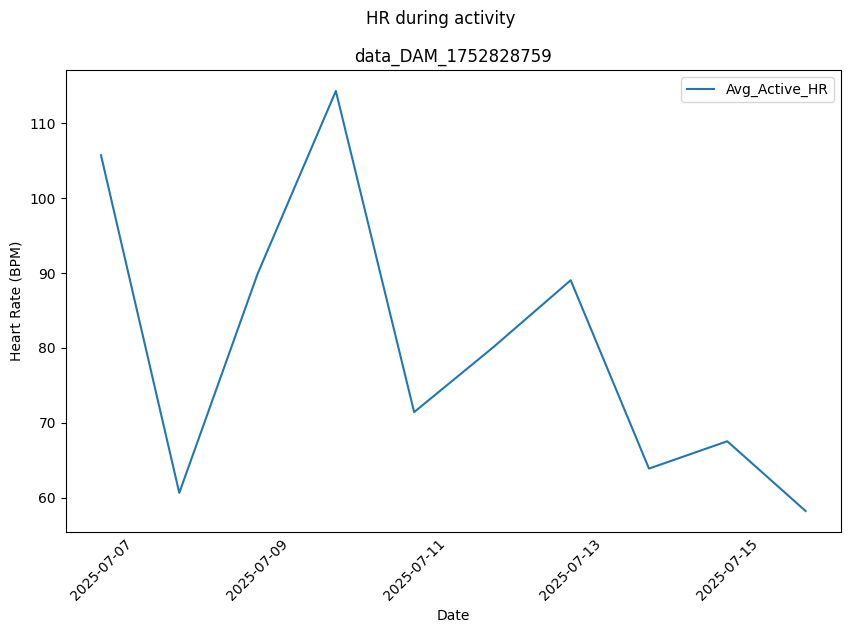

In [69]:
cur=con.cursor()
test_data=cur.execute("SELECT Activities.Avg_Active_HR ,Daily_Vitals.Date FROM Activities INNER JOIN Daily_Vitals on\
                     Activities.Date_Vitals=Daily_Vitals.Date_Vitals WHERE Daily_Vitals.Patient_ID=?", (patient_ID,)).fetchall()
c=[description[0] for description in cur.description]
df=pd.DataFrame(test_data,columns=c)
fig,ax=plt.subplots(figsize=(10,6))
plt.suptitle('HR during activity')
df.plot(x=c[-1],y=c[:-1],ax=ax,ylabel='Heart Rate (BPM)',title=patient_ID)
ax.tick_params(axis='x',labelrotation=45,length=0.1)

In [68]:
cur=con.cursor()
test_data=cur.execute("SELECT Daily_Vitals.* FROM (Daily_Vitals INNER JOIN Dates ON Daily_Vitals.Date=Dates.Date) INNER JOIN Weeks on Dates.Week=Weeks.Week WHERE Weeks.Week=?",('2025-W28',)).fetchall()
c=[description[0] for description in cur.description]
df=pd.DataFrame(test_data,columns=c)
print(df)

   Date_Vitals           Patient_ID        Date  Day_avg_HR  Day_min_HR  \
0            1  data_DAM_1752828759  2025-07-07  105.731500        51.0   
1            2  data_DAM_1752828759  2025-07-08   60.635593        47.0   
2            3  data_DAM_1752828759  2025-07-09   89.879802        43.0   
3            4  data_DAM_1752828759  2025-07-10  114.314629        45.0   
4            5  data_DAM_1752828759  2025-07-11   71.423729        45.0   
5            6  data_DAM_1752828759  2025-07-12   79.991935        56.0   
6            7  data_DAM_1752828759  2025-07-13   89.035956        42.0   

   Day_max_HR  Resting_HR  Avg_PPG_HRV_Day  Std_PPG_HRV_Day  
0       190.0         NaN         0.010555         0.003351  
1       123.0        52.0         0.016941         0.002378  
2       181.0        46.4         0.011909         0.003075  
3       185.0        49.6         0.009674         0.003329  
4       184.0        48.6         0.015079         0.003735  
5       139.0        69.0  